# Music Genre Classification with PCA

### Problem Statement

How can we effectively classify and predict the genre of music tracks based on their distinct characteristics such as tempo, rhythm, etc.?

### Objectives
- Classify music based on their genre using a machine learning model (Logistic Regression).
- Predict the genre of music tracks with missing genres
- Evaluate the effectiveness of PCA as dimensionality reduction technique in terms of improving a model's accuracy and simplicity.

### Project Files
The dataset used in this project is provided by 365 Data Science.

**Music Data Legend.xslx** - This file contains the data type and definition of each the music tracks' characteristics such as rhythym, duration, etc used in the dataset.
**music_dataset_mod.csv** -  This file contains the dataset to be investigated. It consists of 1000 music tracks with distinct characteristics/attributes that classify them into different genres.

The following information are extracted from Music Data Legend.xslx which contains the variable/characteristics' data types and descriptions.

| Variable               | Data Type  | Description                                                                                  |
|------------------------|------------|----------------------------------------------------------------------------------------------|
| Tempo                 | Numerical  | Beats per minute (BPM) of the track.                                                        |
| Dynamic Range         | Numerical  | The range between the quietest and loudest parts of a track, typically measured in decibels (dB). |
| Vocal Presence        | Numerical  | The prominence of vocals in a track.                                                        |
| Percussion Strength   | Numerical  | The intensity and presence of percussion instruments in a track, such as drums or cymbals.  |
| String Instrument Detection | Numerical | The presence and prominence of string instruments like guitars, violins, or cellos in a track. |
| Electronic Element    | Numerical  | The extent to which electronic sounds or synthesizers are used in a track.                  |
| Rhythm Complexity     | Numerical  | The complexity and variation in a track's rhythm patterns, reflecting the intricacy of its beat and timing. |
| Drums Influence       | Numerical  | The drums' contribution to the overall sound of a track, focusing on their impact rather than just presence. |
| Distorted Guitar      | Numerical  | The use of distorted guitar sounds, often associated with genres like rock or metal.        |
| Metal Frequencies     | Numerical  | The use of metal-like sounds in the track.                                                  |
| Ambient Sound Influence | Numerical | The use of ambient sounds in a track, which can add texture and atmospheric elements to the music. |
| Instrumental Overlaps | Numerical  | How different instruments interplay and overlap in a track, indicating the complexity of its instrumental arrangement. |
| Genre                 | Categorical | The categorized genre of the track.                                                        |


In [2314]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### I. Load and explore data

In [2317]:
df = pd.read_csv("music_dataset_mod.csv")

df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [2319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [2321]:
# Discover the different types of Genre
df["Genre"].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

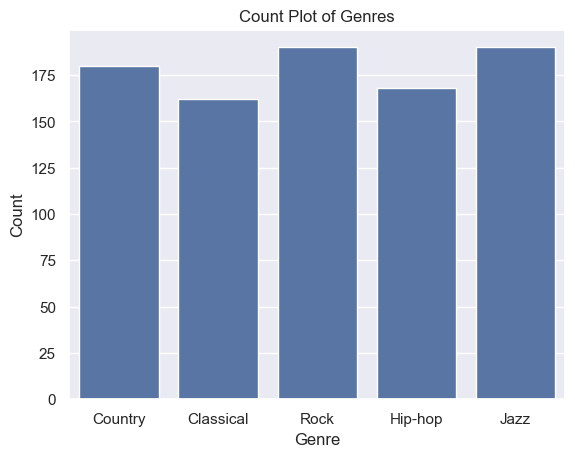

In [2323]:
# Visualise genres
sns.countplot(x = "Genre", data = df)

plt.title("Count Plot of Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

**Note:** An ideal distribution for model training will have bars of roughly equal height—indicating that each genre is equally represented.

From the plot above, we can see that the bars are not equal in height highlighted by the differences in height. Rock and Jazz has the most counts while Classical has the lowest. Jazz and Rock genres may be more popular because of the use of instruments such as guitars, drums, etc. and showcases solo instrument moments and spontaneity, which is trending in this age. While classical genre may be less popular as it focuses on orchestration and harmony and more likely produced during the older times. 

### II. Clean data

In [2327]:
# drop null values
df_cleaned = df.dropna(subset = ["Genre"])
df_cleaned = df_cleaned.copy() # ensures df is not a slice, but a COPY

### III. Split data into features and target



In [2330]:
# Splitting features (X) and target (y)

X = df_cleaned.drop(columns = ["Genre"])
y = df_cleaned["Genre"]

### IV. Encode categorical data

In [2333]:
# Use LabelEncoder() followed by fit_transform() to convert categorical to numerical categories

encoder = LabelEncoder()
df_cleaned["Genre"] = encoder.fit_transform(y)
df_encoded = df_cleaned

y = df_encoded["Genre"]

### V. Correlation analysis

In [2336]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix["Genre"].sort_values(ascending = False))

print(correlation_matrix)

Genre                          1.000000
Distorted Guitar               0.607291
Metal Frequencies              0.582498
Electronic Element Presence    0.232907
Drums Influence                0.169501
Percussion Strength            0.146171
Tempo                          0.113906
Rhythm Complexity              0.095718
Ambient Sound Influence        0.014561
Vocal Presence                -0.005501
Instrumental Overlaps         -0.071734
String Instrument Detection   -0.185088
Dynamics Range                -0.462600
Name: Genre, dtype: float64
                                Tempo  Dynamics Range  Vocal Presence  \
Tempo                        1.000000       -0.019799        0.019506   
Dynamics Range              -0.019799        1.000000        0.026418   
Vocal Presence               0.019506        0.026418        1.000000   
Percussion Strength          0.041447       -0.037116        0.012152   
String Instrument Detection -0.074421        0.127534       -0.056417   
Electronic Ele

<Axes: >

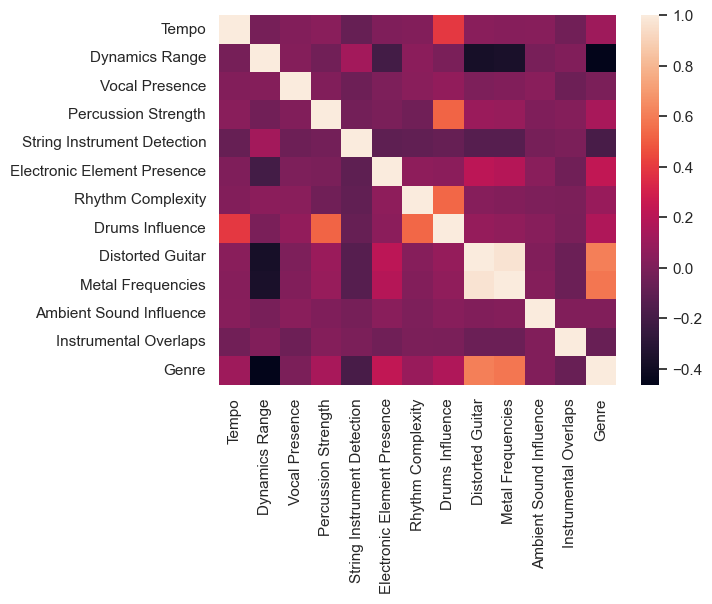

In [2338]:
sns.heatmap(correlation_matrix)

#### Interpretation

From the correlation matrix and heatmap, we can see that the following attributes show moderately positive correlation with a music track's genre: Distorted Guitar (0.61) and Metal Frequencies (0.58), while Dynamics Range (-0.46) shows a moderately negative correlation. On the other hand, the rest of the attributes shows weak to no correlation with the music's genre.

As Distorted Guitar and Metal Frequencies are strong predictors of genre, this supports that genres Jazz and Rock are the more popular ones because of the emphasis on solo instrument moments and spontaneity.

Additionally, from the correlation heatmap, it is evident from the light colored-shade for both Distorted Guitar and Metal Frequencies that they have strong positive correlation with each other. This can affect the model's learning process due to multicollinearity, which can lead to model overfitting or poor generalization. Thus, we can address this by removing one of the highly correlated features or by applying PCA to combine correlated features while still retaining majority of the variance. This step is essential in ensuring accurate model predictions.

### VI. PCA for Dimensionality Reduction in Features

#### Scale data

In [2343]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Explained Variance Ratio: [0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]
Cumulative Variance: [0.20063071 0.35125878 0.44495077 0.53191983 0.61728037 0.69895416
 0.77843687 0.85457161 0.92457383 0.98453586 0.99720895 1.        ]


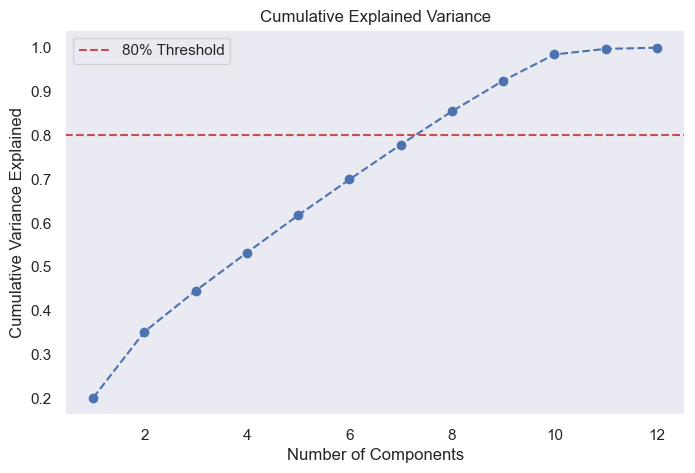

In [2345]:
# Note: Principal Components are new variables created by PCA that summarises data from original dataset into fewer dimensions 
# but still preserving the original data's information

# apply pca
pca = PCA()
X_transformed = pca.fit_transform(X_scaled)

# analyse variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)

# visualise (from chatgpt)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid()
plt.show()


#### Interpretation

**Note:** Ideal is you count the number of components after it reaches the 80% mark (this means these components explains atleast 80% or what is needed to retain information from dataset with fewer dimensionality). But in the case wherein the curve flattens ("elbow curve") before it reaches the 80% mark, lessen the number of components upto before it started to flatten, sacrificing variance for simplicity which would benefit the model better.

In this case, the curve continues to rise past the 80% mark and starts to flatten at approx. 11 components. The last number of components before it reaches the mark is 8 components, indicating that the minimum number of components wherein the original data's information can be preserved is at 8 components.


#### Decide on Number of Components (n_components)
From the PCA plot, we can conclude that ideal number of components for the model is 7.

#### Reapply PCA

In [2350]:
pca = PCA(n_components = 8)
X_pca = pca.fit_transform(X_scaled)

# Note: pca is only applied to features because target is already simplified as it is usually one variable, while features can be a lot.

### VII. Evaluating Classification Efficacy – PCA Transformed vs. Original Data

#### Split test and train data

In [2354]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)

#### Train data

In [2357]:
modelPCA = LogisticRegression(max_iter = 10000)
modelPCA.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### Evaluate model using accuracy score and classification report

In [2360]:
y_pred = modelPCA.predict(X_test)
y_pred

array([4, 3, 0, 0, 0, 3, 3, 4, 1, 3, 4, 2, 2, 4, 0, 0, 0, 0, 1, 1, 0, 4,
       0, 0, 3, 3, 2, 0, 1, 1, 1, 3, 1, 4, 1, 4, 4, 4, 2, 3, 3, 3, 2, 4,
       0, 0, 4, 4, 0, 2, 0, 4, 0, 4, 1, 1, 3, 3, 3, 3, 2, 0, 1, 2, 3, 4,
       0, 4, 4, 4, 2, 4, 4, 1, 2, 3, 3, 1, 0, 4, 2, 4, 0, 1, 0, 2, 4, 3,
       3, 0, 2, 4, 3, 1, 0, 1, 4, 4, 4, 1, 1, 3, 2, 1, 4, 2, 2, 4, 4, 2,
       1, 0, 2, 3, 4, 3, 2, 3, 3, 3, 3, 0, 3, 0, 4, 4, 2, 0, 1, 2, 3, 3,
       1, 1, 0, 3, 0, 4, 0, 4, 2, 0, 0, 0, 2, 0, 0, 2, 3, 0, 3, 4, 3, 2,
       1, 4, 3, 2, 1, 1, 4, 3, 2, 1, 4, 2, 2, 0, 1, 4, 3, 0, 3, 4, 0, 3,
       0, 0, 0, 1, 3, 4, 1, 3, 3, 2, 2, 4, 3, 3, 4, 0, 4, 4, 4, 3, 0, 2,
       3, 4, 4, 2, 0, 4, 2, 0, 0, 0, 1, 3, 3, 3, 3, 2, 3, 3, 4, 1, 4, 0,
       4, 0, 3, 2, 0, 3, 2, 4, 4, 2, 3, 4, 4, 3, 0, 1, 3, 4, 4, 1, 4, 0,
       3, 1, 2, 4, 1, 3, 2, 3, 4, 3, 4, 0, 4, 3, 0, 1, 4, 4, 4, 2, 1, 0,
       2, 2, 3])

In [2362]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Accuracy:  0.5355805243445693

Classification Report:
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



#### Repeat process for original data

In [2365]:
# Note: for this step, scaling is done after split training and test dat data. While for PCA, scaling is applied beforehand 
# because it is an essential step for PCA.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter = 10000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Accuracy:  0.5243445692883895

Classification Report:
               precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.44      0.46      0.45        48
        Jazz       0.43      0.37      0.40        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.52       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.52      0.51       267



#### Compare results

From the accuracy and classification reports results, we can conclude that the PCA transformed model (at 0.53 accuracy) slightly performed better than the original data model (at 0.52) in terms of accuracy and precision. This proves that PCA dimensionality reduction is effective in reducing noise or redundancy in a dataset while still retaining important information. Additionally, PCA improved the model's accuracy and precision, suggesting that it can possibly handle similar cases in the future more effectively.

Both models had high precision scores for Classical music with PCA transformed being slightly higher. While the original model, however, performs better for Hip-hop. The rest of the genres had moderate precision scores for both models.

### VIII. Genre Prediction and Integration

#### Prepare data for prediction (those with missing genres from original data)

In [2370]:
df_isnull = df[df["Genre"].isna()]
df_isnull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [2372]:
df_isnull = df_isnull.drop(columns = ["Genre"])
df_isnull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399
...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283


#### Apply prediction model to original data

**Note:** During model training, if you scaled your data (e.g., using StandardScaler or MinMaxScaler), the same scaling transformation must be applied to the new data (e.g., the data you're using for prediction).

In [2376]:
X_unknown_genre_scaled = scaler.transform(df_isnull)

X_unknown_genre_pca = pca.transform(df_isnull)

y_pred_unknown = modelPCA.predict(X_unknown_genre_pca)

y_pred_unknown = encoder.inverse_transform(y_pred_unknown)

y_pred_unknown

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array(['Classical', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Jazz',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Jazz', 'Jazz', 'Rock', 'Rock', 'Rock',
       'Classical', 'Rock', 'Rock', 'Rock', 'Classical', 'Jazz',
       'Classical', 'Rock', 'Classical', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Classical', 'Rock', 'Rock', 'Jazz', 'Classical',
       'Classical', 'Rock', 'Rock', 'Jazz', 'Rock', 'Jazz', 'Classical',
       'Jazz', 'Rock', 'Rock', 'Classical', 'Rock', 'Rock', 'Jazz',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Classical', 'Classical',
       'Rock', 'Rock', 'Rock', 'Jazz', 'Classical', 'Rock', 'Rock',
       'Jazz', 'Rock', 'Rock', 'Rock', 'Classical', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Classical', 'Rock', 'Jazz',
       'Classical', 'Rock', 'Jazz', 'Rock', 'Rock', 'Rock', 'Classical',
       'Rock', 'Rock', 'Classical', 'Rock', 'Rock', 'Classical', 'Rock',
       'Classical', 'Ro

#### Append the predicted values to the their corresponding "missing genre" indices

In [2379]:
missing_genre_indices = df[df["Genre"].isna()].index

if len(missing_genre_indices) != len(y_pred_unknown):
    raise ValueError("The number of predictions does not match the number of missing values.")

missing_genre_indices

Index([ 13,  18,  22,  31,  42,  48,  57,  58,  75,  90,
       ...
       986, 987, 988, 989, 990, 991, 992, 993, 994, 995],
      dtype='int64', length=110)

In [2381]:
df.loc[missing_genre_indices, "Genre"] = y_pred_unknown

#### Ensure original data is properly updated with the predicted genres

In [2384]:
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


### IX. Conclusion